In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

Create and play with the properties of a quantum object

In [ ]:
# Create a random operator as a 2x2 square matrix
Operator1 = Qobj([[1, 2], [2, 4]])
print(Operator1)

# Create a random state as a 2 vector
State1 = Qobj([[1], [2]])
print(State1)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 2.]
 [2. 4.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [2.]]


In [3]:
# Generate some useful operators

H = Qobj([[1, 2, 3, 4], [1, 2, 3, 4],[1, 2, 3, 4],[1, 2, 3, 4]])
e, s = H.groundstate()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\qutip\core\qobj.py:1626: UserWarning: Ground state may be degenerate.
  warnings.warn("Ground state may be degenerate.", UserWarning)


In [4]:
print(e, s)

0j Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.98198051]
 [-0.10910895]
 [-0.10910895]
 [-0.10910895]]


In [5]:
#   Tensor notation
g = basis(2, 0)     # Ground state is (1, 0), basis(2,0) means a "2" dim vector with 1 being at the "0"th index
n = basis(2, 1)

a = destroy(2)      # Make the annihilation and excitation operators
sig_p = create(2)

e = (sig_p*g)       # Act excitation on ground
n_1 = (a*n)         # Act annihilation on n photons


print('atom g', g.full())
print('light n', n.full())
print('atom e', e.full())
print('light n-1', n_1.full())

e_n_1 = tensor(e, n_1)  # Encode by making this |e, n-1>


# We can achieve the same e_n_1 as above directly using tensors:
# instead of applying sig_p on g and a on n directly, I make sig_p X a and g X n
# (where X is tensor product) and apply one to the other
g_n = tensor(g, n)
e_n_1_tens = tensor(sig_p, a)*g_n


# Comparing the results to find they are the same
print('tens', e_n_1_tens.full())
print('no tens', e_n_1.full())

atom g [[1.+0.j]
 [0.+0.j]]
light n [[0.+0.j]
 [1.+0.j]]
atom e [[0.+0.j]
 [1.+0.j]]
light n-1 [[1.+0.j]
 [0.+0.j]]
tens [[0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]]
no tens [[0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]]


In [6]:
# Making the hamiltonian

# N = number of photons, thus number of "possible" atom states, but of course only
# two is accessible (ground and n), and we do not allow further excitation. Thus
# still work in 2 dimensions, but N is used for scaling?
N = 10
a = destroy(2)
a_dag = a.dag()
sig_p = create(2)
sig_m = destroy(2)
sigma_z = tensor(sigmaz(), qeye(2)) # making sigmaz a tensor that only applies on the atom, not light
                                  # because qeye is the identity matrix, and in this program:
                                  # (A X B)(gXn) --> Ag X Bn if A and B applies on g and n only, respectively
Count_op = tensor(qeye(2), a_dag*a)

wa = 1 # atom frequency
wc = 2 # photon frequency
Omega = 1 # Rabi oscillation frequency


H_JC = wa/2 * sigma_z + wc*Count_op + Omega/2 * (tensor(sig_p, a) + tensor(sig_m, a_dag))

print(H_JC.eigenstates())
print(H_JC.eigenenergies())


(array([-0.58113883,  0.5       ,  1.5       ,  2.58113883]), array([Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
       Qobj data =
       [[ 0.        ]
        [-0.16018224]
        [ 0.98708746]
        [ 0.        ]]                                                             ,
       Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
       Qobj data =
       [[1.]
        [0.]
        [0.]
        [0.]]                                                                      ,
       Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
       Qobj data =
       [[0.]
        [0.]
        [0.]
        [1.]]                                                                      ,
       Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
       Qobj data =
       [[0.        ]
        [0.98708746]
        [0.16018224]
        [0.        ]]                                           

In [7]:
print(Count_op * g_n)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]


In [8]:
sig = tensor(sigmaz(), qeye(2))
print(e_n_1)

print(sig*e_n_1)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.]
 [ 0.]
 [-1.]
 [ 0.]]


In [9]:
print(g_n)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]


In [10]:
print(e_n_1)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]


Making N photon states (ofc only 2 is accessible)

In [11]:
N = 2 # number of photon states (number of photons + 1(no photon state) )
g = basis(2, 0)
n = basis(N, N-1)

e = basis(2, 1)
n_1 = basis(N, N-2)

g_n = tensor(g, n)
e_n_1 = tensor(e, n_1)


sigma_z = tensor(sigmaz(), qeye(N))
a = tensor(qeye(2), destroy(N))
a_dag = a.dag()
sig_p = tensor(create(2), qeye(N))
sig_m = sig_p.dag()

int_excitation = tensor(create(2), destroy(N))
int_deexcitation = tensor(destroy(2), create(N))
int_perturn = tensor(destroy(2), destroy(N)) + tensor(create(2), create(N))



print('-------------- |e,n-1> ----------------')
print('Original state : ')
print(e_n_1)
print('acted on state :')
print((a_dag*a)*e_n_1)


print('-------------- |g,n> ------------------')
print(sig_m*g_n)
print((a_dag*a)*g_n)
print(n)

-------------- |e,n-1> ----------------
Original state : 
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
acted on state :
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]]
-------------- |g,n> ------------------
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]


In [12]:
n_g = tensor(n, g)
g_g = tensor(basis(5, 1), basis(2, 1))
print(g_g)

Quantum object: dims=[[5, 2], [1, 1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [13]:
wa = 2.5
wc = 2
Omega = 3
H_JC = wa/2 * sigma_z + wc * a_dag*a + Omega/2 * (int_excitation + int_deexcitation + int_perturn)

# print(H_JC.eigenstates())
# print(g_n)
# print(e_n_1)

In [14]:
from prettytable import PrettyTable

matrix = np.round(np.real(H_JC.full()))
table = PrettyTable()

for row in matrix:
    table.add_row(row)


# What what what what

In [ ]:
class Hamiltonian:
    def __init__(self, wa, wc, Omega, N, perturb):
        self.wa = wa
        self.wc = wc
        self.Omega = Omega
        self._Hjc(N, perturb = perturb)
    def _Hjc (self, N, perturb = False):
        # N = number of photon states (number of photons + 1(no photon state) )
        Omega = self.Omega
        wc = self.wc
        wa = self.wa
        sigma_z = tensor(qeye(N), sigmaz())
        a = tensor(destroy(N), qeye(2))
        a_dag = a.dag()
        sig_p = tensor(qeye(N), create(2))
        sig_m = sig_p.dag()

        int_excitation = tensor(destroy(N), create(2))
        int_deexcitation = tensor(create(N), destroy(2))
        int_perturb = tensor(destroy(N), destroy(2)) + tensor(create(N), create(2))

        if perturb == True:
            self.H_JC = (wa/2 * sigma_z + wc * a_dag*a + Omega/2 * (int_excitation + int_deexcitation + int_perturb))
        else:
            self.H_JC = (wa/2 * sigma_z + wc * a_dag*a + Omega/2 * (int_excitation + int_deexcitation))


# Doga's code

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =

C:\Users\USER\AppData\Local\Temp\ipykernel_13348\238893379.py:63: RuntimeWarning: invalid value encountered in scalar divide
  analytical_k2 = (Omega**2/4 *1) / (d**2 / 2 - d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )


Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =

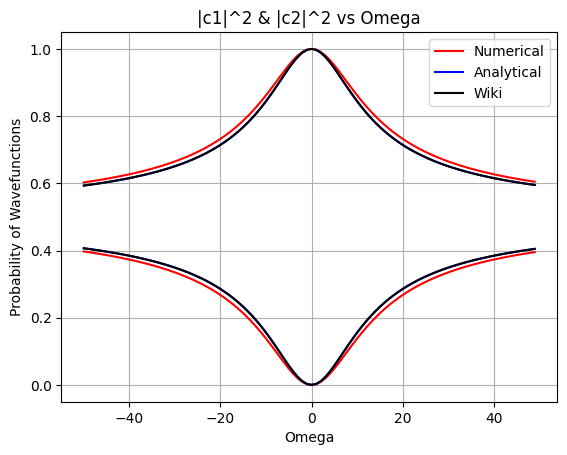

In [173]:
import numpy as np
N=2
times = np.linspace(0.0, 10.0, 500)
psi0 = tensor(fock(N, 1), fock(2,0) )
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sigma_z = tensor(qeye(N),sigmaz())


wc= 0.5
wa= 10
d = wa-wc #check

c_0_evlt=[]
c_1_evlt=[]
Omega_vals=[]

k1_vals = []
k2_vals =[]

wiki_vals = []
wiki_vals2=[]

for i in range(-50,50):
    Omega = i
    # print(i)
    Omega_vals.append(i)
# decoupled Hamiltonian
    H0 = wc * a.dag() * a + wa/2 * sigma_z

# interaction Hamiltonian
    #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
# interaction Hamiltonian
    
    H = H0 + H1
# Find the eigenstates of the Hamiltonian
    evals, evecs = H.eigenstates()
# Time evolution
    result = mesolve(H, psi0, times, [], [])
# Check higher eigenstates
    num_eigenstates = 4
    c = [[] for _ in range(num_eigenstates)]

    #for state in result.states:
     #   for i in range(num_eigenstates):
        #c[i].append(evecs[i].overlap(state).real)
        
      #      c[i].append(evecs[i].dag() * state) 
      
    for i in range(num_eigenstates):
        c[i].append(evecs[i].overlap(psi0))
    print(psi0)
        #print(i,c[i])
    #print(evecs[3])
    #print(c[3])
    # print(H)
            
    c_0_evlt.append(np.abs(c[0][0])**2)
    c_1_evlt.append(np.abs(c[3][0])**2)
    
    analytical_k1 = (Omega**2/4 *1) / (d**2 / 2 + d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    analytical_k2 = (Omega**2/4 *1) / (d**2 / 2 - d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    k1_vals.append(analytical_k1)
    k2_vals.append(analytical_k2)
    wiki = np.sin((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals.append(wiki**2)
    wiki2 = np.cos((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals2.append(wiki2**2)
    
# mpl.rc("figure", figsize=(10, 8))
plt.figure()
#plt.plot(Omega_vals, c_0_evlt, label=f"|c{1}|^2", color ="red")
#plt.plot(Omega_vals, c_1_evlt, label=f"|c{2}|^2", color ="red")
plt.plot(Omega_vals, c_0_evlt, label="Numerical", color ="red")
plt.plot(Omega_vals, c_1_evlt, color ="red")
#plt.plot(Omega_vals, k1_vals, label=f"|k{1}|^2", color ="blue")
#plt.plot(Omega_vals, k2_vals, label=f"|k{2}|^2", color ="blue")
plt.plot(Omega_vals, k2_vals, label="Analytical", color ="blue")
plt.plot(Omega_vals, k1_vals, color ="blue")
#plt.plot(Omega_vals, wiki_vals, label ="wiki", color ="black")
#plt.plot(Omega_vals, wiki_vals2, label ="wiki", color ="black")
plt.plot(Omega_vals, wiki_vals, label ="Wiki", color ="black")
plt.plot(Omega_vals, wiki_vals2, color ="black")
plt.xlabel("Omega")
plt.ylabel("Probability of Wavefunctions")
plt.title("|c1|^2 & |c2|^2 vs Omega") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()


In [17]:
Hamiltonian(10, 0.5, 2, 2, False).H_JC

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 5.   0.   0.   0. ]
 [ 0.  -5.   1.   0. ]
 [ 0.   1.   5.5  0. ]
 [ 0.   0.   0.  -4.5]]

# End of Doga's Code

In [18]:
from prettytable import PrettyTable

Hjc = Hamiltonian(1, 1, 2, 10, True).H_JC

matrix = np.real(Hjc.full())
table = PrettyTable()

for row in matrix:
    table.add_row(row)
print(table)

+---------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----------+
| Field 1 | Field 2 |      Field 3       |      Field 4       |      Field 5       |      Field 6       |      Field 7       |      Field 8       |     Field 9      |     Field 10     |      Field 11     |      Field 12     |      Field 13      |      Field 14      |      Field 15      |      Field 16      |      Field 17      |      Field 18      | Field 19 | Field 20 |
+---------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+-------------------+-------------------+--------------------+------

[0j, (0.0009429861989613436+0j), (0.0018859044603244252+0j), (0.002828686570589711+0j), (0.0037712645401691176+0j), (0.004713570481669281+0j), (0.005655536679742984+0j), (0.006597095116931481+0j), (0.0075381776007099974+0j), (0.008478716056239566+0j), (0.009418643093591382+0j), (0.010357890730832103+0j), (0.011296390895623135+0j), (0.012234076414993467+0j), (0.01317087956869133+0j), (0.014106732315045473+0j), (0.01504156756967901+0j), (0.015975318032567163+0j), (0.016907915889143588+0j), (0.017839294003369074+0j), (0.018769385609312503+0j), (0.019698123283392505+0j), (0.02062543973080262+0j), (0.02155126847949726+0j), (0.022475542791698316+0j), (0.02339819602172906+0j), (0.02431916162994184+0j), (0.025238373204949812+0j), (0.026155764514018857+0j), (0.027071269420331747+0j), (0.02798482190693168+0j), (0.02889635607271803+0j), (0.029805806168682645+0j), (0.030713106722501108+0j), (0.031618192360739365+0j), (0.03252099786098137+0j), (0.03342145815560241+0j), (0.034319508341256376+0j), (0

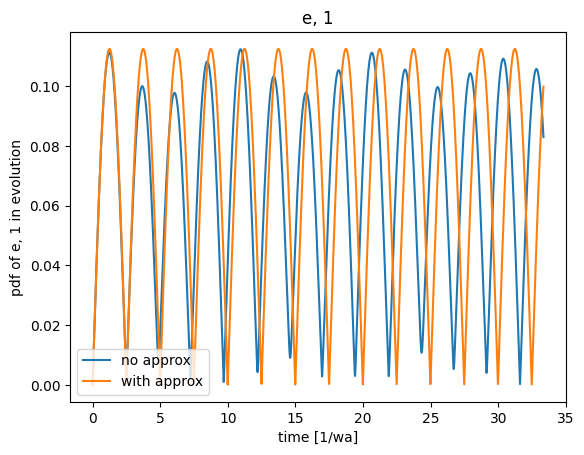

[(1+0j), (0.9999988884559782+0j), (0.999995553958002+0j), (0.9999899969118803+0j), (0.9999822179926312+0j), (0.9999722181412843+0j), (0.9999599985627192+0j), (0.9999455607351203+0j), (0.9999289064162014+0j), (0.9999100376335623+0j), (0.9998889566511648+0j), (0.999865666028072+0j), (0.9998401686028285+0j), (0.9998124674266661+0j), (0.9997825658505507+0j), (0.9997504675231939+0j), (0.9997161762889673+0j), (0.9996796962720579+0j), (0.9996410319138974+0j), (0.9996001878642989+0j), (0.9995571689977589+0j), (0.9995119805245183+0j), (0.9994646279159015+0j), (0.999415116814275+0j), (0.9993634531563074+0j), (0.9993096431332302+0j), (0.999253693188418+0j), (0.999195610013825+0j), (0.9991354005420199+0j), (0.9990730719550117+0j), (0.9990086316804423+0j), (0.9989420873911948+0j), (0.9988734470006996+0j), (0.9988027186460302+0j), (0.998729910705024+0j), (0.9986550317896388+0j), (0.9985780907440717+0j), (0.9984990966438475+0j), (0.9984180587920464+0j), (0.9983349867180492+0j), (0.9982498901777448+0j

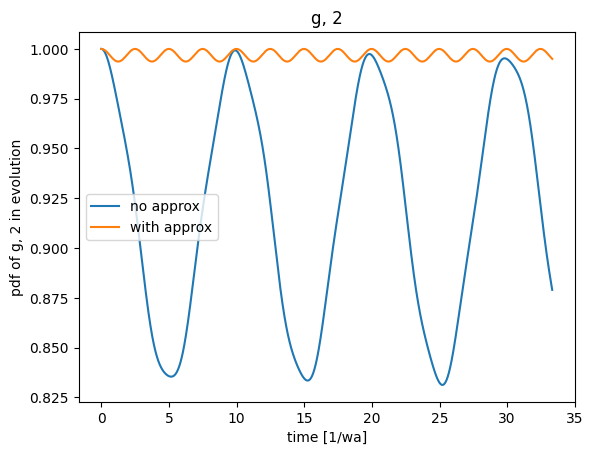

[0j, (0.0011549299307893307+0j), (0.002309852273682896+0j), (0.0034647586407080882+0j), (0.004619641247540105+0j), (0.005774492767438304+0j), (0.00692930611149865+0j), (0.00808407336629106+0j), (0.0092387856595357+0j), (0.010393434440670774+0j), (0.01154801369014618+0j), (0.012702514910252595+0j), (0.013856929052764535+0j), (0.015011250375071117+0j), (0.01616547077123726+0j), (0.01731958061341365+0j), (0.018473573766992095+0j), (0.019627442979257812+0j), (0.02078117865589383+0j), (0.021934773549064545+0j), (0.02308822155389047+0j), (0.02424151359786115+0j), (0.02539464070671982+0j), (0.026547596757508347+0j), (0.02770037416115835+0j), (0.0288529652571302+0j), (0.03000536235625018+0j), (0.031157557799302953+0j), (0.03230954410998537+0j), (0.033461313720865755+0j), (0.03461285903958862+0j), (0.035764172426741486+0j), (0.036915246255139644+0j), (0.0380660731884351+0j), (0.039216645812915694+0j), (0.04036695672659239+0j), (0.0415169985368453+0j), (0.042666763827691585+0j), (0.0438162451449

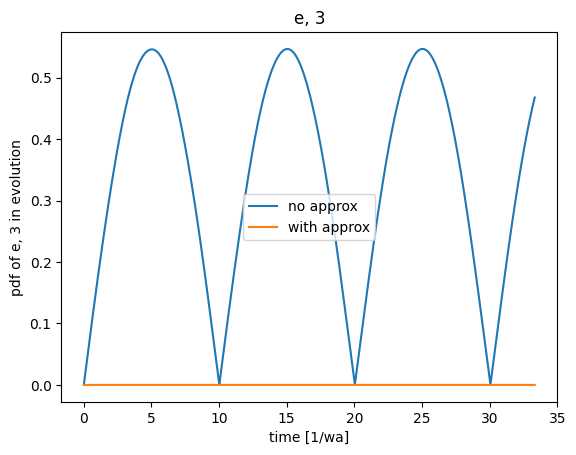

In [126]:
tau = np.linspace(0, 50, 5000)

H_JC_P = Hamiltonian(1.5, 1, 0.2, 10, True).H_JC
H_JC = Hamiltonian(1.5, 1, 0.2, 10, False).H_JC
wa = Hamiltonian(1.5, 1, 0.2, 10, False).wa

psi0 = tensor(basis(10, 2), basis(2, 0))
# psi0 = H_JC.eigenstates()[1][1]

# Perform unitary evolution
resultP = mesolve(H_JC_P, psi0, tau)
result = mesolve(H_JC, psi0, tau)

g = tensor(basis(5, 2), basis(2, 0))
e = tensor(basis(5, 1), basis(2, 1))
extra = tensor(basis(5, 3), basis(2, 1))

# Access the results
statesP = resultP.states
states = result.states
# print(statesP[1])
# Visualize the results
expect_z = [np.sqrt((statesP[i].overlap(e))*np.conjugate(statesP[i].overlap(e))) for i in range(len(tau))]
expect_2 = [np.sqrt((states[i].overlap(e))*np.conjugate(states[i].overlap(e))) for i in range(len(tau))]
print(expect_z)
plt.plot(tau/wa, expect_z, label = 'no approx')
plt.plot(tau/wa, expect_2, label = 'with approx')
plt.legend()
plt.xlabel('time [1/wa]')
plt.ylabel('pdf of e, 1 in evolution')
plt.title('e, 1')
# plt.ylim(0.9, 1.01)
plt.show()

expect_z = [np.sqrt((statesP[i].overlap(g))*np.conjugate(statesP[i].overlap(g))) for i in range(len(tau))]
expect_2 = [np.sqrt((states[i].overlap(g))*np.conjugate(states[i].overlap(g))) for i in range(len(tau))]
print(expect_z)
plt.plot(tau/wa, expect_z, label = 'no approx')
plt.plot(tau/wa, expect_2, label = 'with approx')
plt.legend()
plt.xlabel('time [1/wa]')
plt.ylabel('pdf of g, 2 in evolution')
plt.title('g, 2')
# plt.ylim(0, 0.15)
plt.show()

expect_z = [np.sqrt((statesP[i].overlap(extra))*np.conjugate(statesP[i].overlap(extra))) for i in range(len(tau))]
expect_2 = [np.sqrt((states[i].overlap(extra))*np.conjugate(states[i].overlap(extra))) for i in range(len(tau))]
print(expect_z)
plt.plot(tau/wa, expect_z, label = 'no approx')
plt.plot(tau/wa, expect_2, label = 'with approx')
plt.legend()
plt.xlabel('time [1/wa]')
plt.ylabel('pdf of e, 3 in evolution')
plt.title('e, 3')
# plt.ylim(0, 0.15)
plt.show()

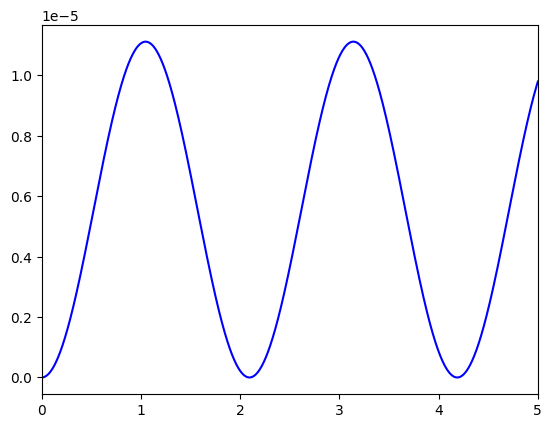

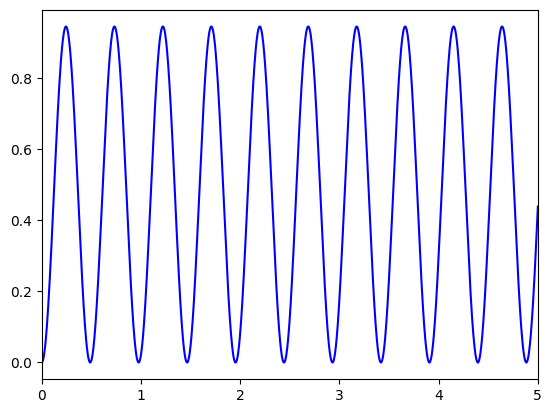

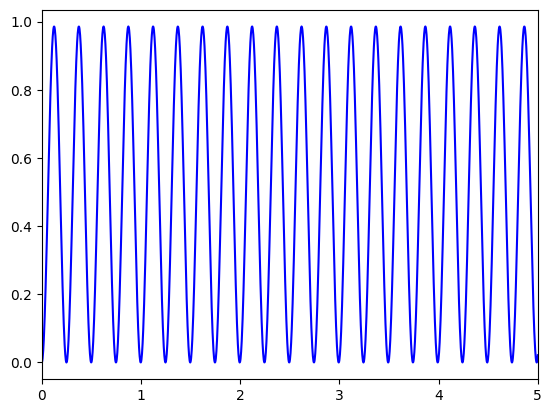

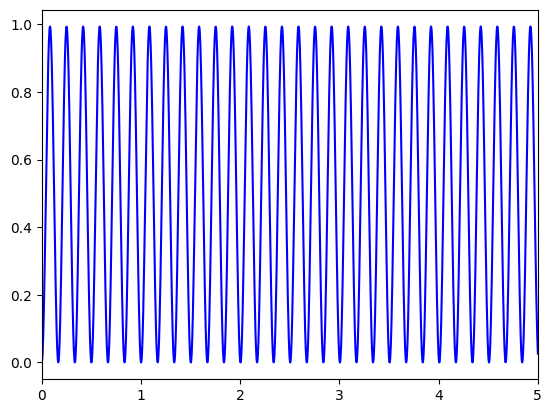

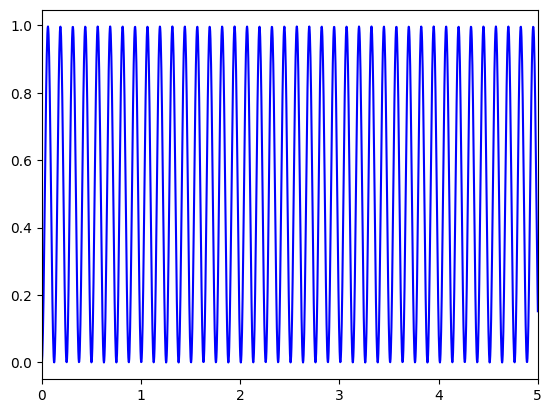

In [287]:
import scipy.fft as ft

freqP = []
freq = []
Peaks = []
om = np.linspace(0.01, 50, 5)

def peak_find (P, t):
    t_peak = []
    for i in range(len(t)-2):
        if P[i+1]>P[i] and P[i+1]>P[i+2]:
            t_peak.append(t[i+1])
            continue
    return t_peak
            
N = 5

for i in om:

    tau = np.linspace(0, 30, 10000)

    H_JC_P = Hamiltonian(1, 1, i, N, True).H_JC
    H_JC = Hamiltonian(1, 1, i, N, False).H_JC
    # print(H_JC)
    # print(H_JC_P == H_JC)
    wa = Hamiltonian(1, 1, i, N, False).wa

    psi0 = tensor(basis(N, 1), basis(2, 0)) #g_1
    
    # psi0 = H_JC.eigenstates()[1][1]

    # Perform unitary evolution
    resultP = mesolve(H_JC_P, psi0, tau)
    result = mesolve(H_JC, psi0, tau)

    g = tensor(basis(N, 1), basis(2, 0))
    e = tensor(basis(N, 0), basis(2, 1))
    e_2 = tensor(basis(N, 2), basis(2, 1))
    # print(e)
    # extra = tensor(basis(5, 3), basis(2, 1))

    # Access the results
    statesP = resultP.states
    states = result.states

    # print(statesP == states)


    expect_z = np.array([np.sqrt((statesP[i].overlap(e_2))*np.conjugate(statesP[i].overlap(e_2))) for i in range(len(tau))])
    expect_2 = np.array([np.sqrt((states[i].overlap(e))*np.conjugate(states[i].overlap(e))) for i in range(len(tau))])

    ###############################
    # time, z = tau, expect_z**2

    # T_peak = peak_find(z, time)
    # # print(T_peak)
    # f = 1/np.average([T_peak[i+1]-T_peak[i] for i in range(len(T_peak)-1)])
    # # print(z)

    ###############################



    # N = len(time)
    # yf1 = ft.fft(z)
    # xf1 = ft.fftfreq(N)
    # xx1=xf1[int(len(xf1)/2+1):len(xf1)]
    # distance = time[1:]-time[:-1] 
    # repx1=distance.mean()/xx1

    # plt.plot(time, np.abs(z))
    # plt.vlines(T_peak, 0, 1, lw = 1)
    # plt.show()

    # f, I = abs(repx1), abs(yf1[int(len(xf1)/2+1):len(xf1)])

    # yf = abs(yf1[int(len(xf1)/2+1):len(xf1)])

    # freqP.append(f)
    # plt.plot(time, z, 'r-')
    # plt.vlines(T_peak, 0, 1, lw = 1, color = 'red')




    time, z = tau, np.abs(expect_2)**2
    T_peak = peak_find(z, time)
    plt.plot(time, z, 'b-')
    # plt.vlines(T_peak, 0, 1, lw = 1, color = 'blue')
    plt.xlim(0, 5)
    
    plt.show()



    
    # print(T_peak)
    f = 1/np.average([T_peak[i+1]-T_peak[i] for i in range(len(T_peak)-1)])

    # N = len(time)
    # yf1 = ft.fft(z)
    # xf1 = ft.fftfreq(N)
    # xx1=xf1[int(len(xf1)/2+1):len(xf1)]
    # distance = time[1:]-time[:-1] 
    # repx1=distance.mean()/xx1

    # f, I = abs(repx1), abs(yf1[int(len(xf1)/2+1):len(xf1)])

    # yf = abs(yf1[int(len(xf1)/2+1):len(xf1)])

    freq.append(f)
    Peaks.append(np.max(z))


    # plt.plot(f, np.abs(I))
    # plt.show()
    # plt.plot(time, np.abs(z))
    # plt.show()

    




-1


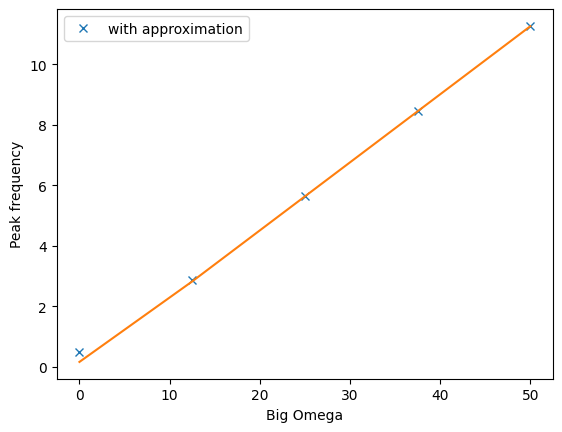

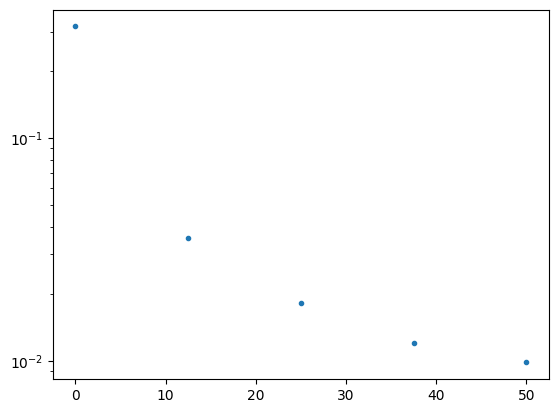

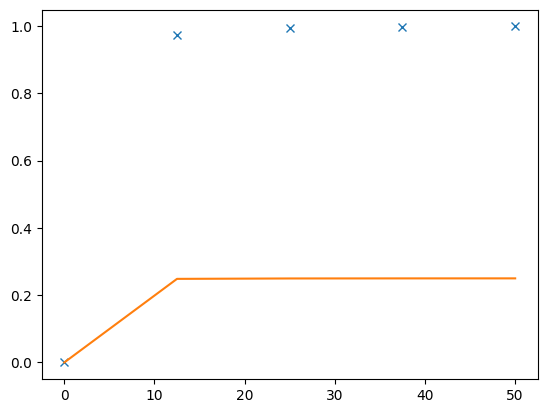

In [ ]:
d = Hamiltonian(1, 2, i, 10, False).wa - Hamiltonian(1, 2, i, 10, False).wc
print(d) 
w_ana = np.sqrt(d**2 + (om)**2)/(2*np.pi) 
# print(w_ana)
# plt.plot(om, freqP, '.', label = 'without approximation')
plt.plot(om, np.array(freq), 'x', label = 'with approximation')
plt.plot(om, w_ana)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Big Omega')
plt.ylabel('Peak frequency')
plt.legend()
plt.show()

plt.plot(om, np.abs(w_ana - np.array(freq)), '.')
# plt.xscale('log')
plt.yscale('log')
plt.show()


F_ana = (2*om/(4*np.sqrt(d**2 + om**2)))**2
plt.plot(om, np.array(Peaks), 'x')
plt.plot(om, F_ana)
plt.show()


Testing commutative

In [22]:
pho = tensor(create(3), qeye(2))
atom = tensor(qeye(3), destroy(2))
state = tensor(basis(3, 1), basis(2, 1))

In [23]:
print(pho*atom)
print(atom*pho)
print(tensor(create(3), destroy(2)))

Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.41421356 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.41421356 0.         0.        ]
 [0.         0.         0.         0

In [25]:
Hamiltonian(10, 0.5, 2, 2, False).H_JC

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 5.   0.   0.   0. ]
 [ 0.  -5.   1.   0. ]
 [ 0.   1.   5.5  0. ]
 [ 0.   0.   0.  -4.5]]